<a href="https://colab.research.google.com/github/kdemertzis/Earthquakes/blob/main/Mamdani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 15.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=958b94cac61d81904e4f3a9734aacda91db08dbaf25e98481fad541719e2cd5b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


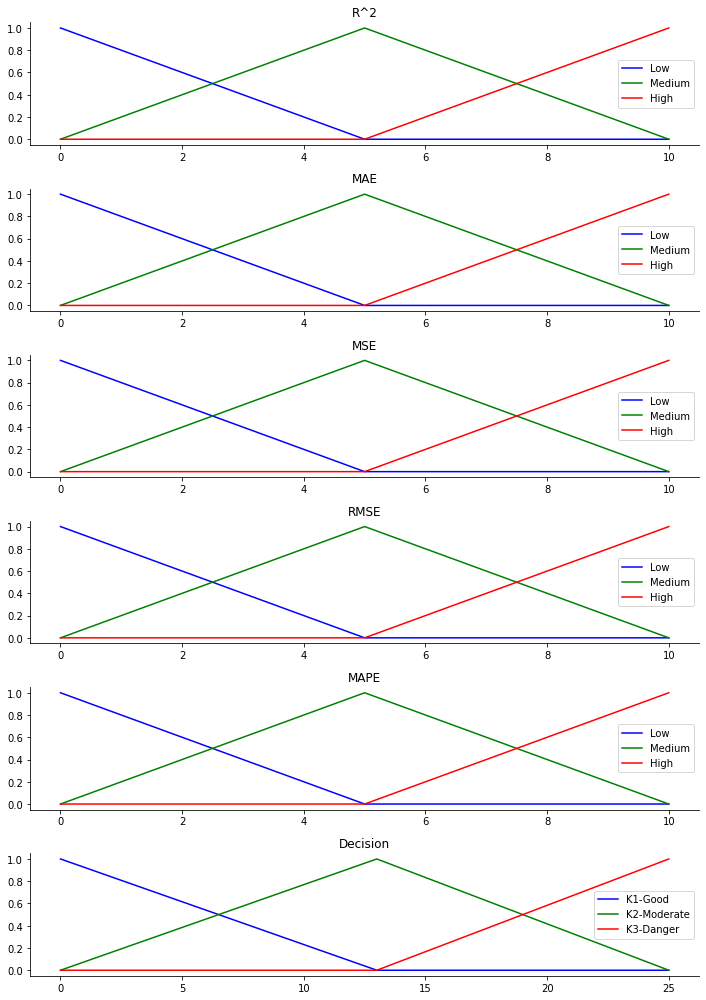

In [27]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_r2 = np.arange(0, 11, 1)
x_mae = np.arange(0, 11, 1)
x_mse = np.arange(0, 11, 1)
x_rmse = np.arange(0, 11, 1)
x_mape = np.arange(0, 11, 1)
x_dec  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
r2_lo = fuzz.trimf(x_r2, [0, 0, 5])
r2_md = fuzz.trimf(x_r2, [0, 5, 10])
r2_hi = fuzz.trimf(x_r2, [5, 10, 10])

mae_lo = fuzz.trimf(x_mae, [0, 0, 5])
mae_md = fuzz.trimf(x_mae, [0, 5, 10])
mae_hi = fuzz.trimf(x_mae, [5, 10, 10])

mse_lo = fuzz.trimf(x_mse, [0, 0, 5])
mse_md = fuzz.trimf(x_mse, [0, 5, 10])
mse_hi = fuzz.trimf(x_mse, [5, 10, 10])

rmse_lo = fuzz.trimf(x_rmse, [0, 0, 5])
rmse_md = fuzz.trimf(x_rmse, [0, 5, 10])
rmse_hi = fuzz.trimf(x_rmse, [5, 10, 10])

mape_lo = fuzz.trimf(x_mape, [0, 0, 5])
mape_md = fuzz.trimf(x_mape, [0, 5, 10])
mape_hi = fuzz.trimf(x_mape, [5, 10, 10])

dec_lo = fuzz.trimf(x_dec, [0, 0, 13])
dec_md = fuzz.trimf(x_dec, [0, 13, 25])
dec_hi = fuzz.trimf(x_dec, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(10, 14))

ax0.plot(x_r2, r2_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_r2, r2_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_r2, r2_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('R^2')
ax0.legend()

ax1.plot(x_mae, mae_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_mae, mae_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_mae, mae_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('MAE')
ax1.legend()

ax2.plot(x_mse, mse_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_mse, mse_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_mse, mse_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('MSE')
ax2.legend()

ax3.plot(x_rmse, rmse_lo, 'b', linewidth=1.5, label='Low')
ax3.plot(x_rmse, rmse_md, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_rmse, rmse_hi, 'r', linewidth=1.5, label='High')
ax3.set_title('RMSE')
ax3.legend()

ax4.plot(x_mape, mape_lo, 'b', linewidth=1.5, label='Low')
ax4.plot(x_mape, mape_md, 'g', linewidth=1.5, label='Medium')
ax4.plot(x_mape, mape_hi, 'r', linewidth=1.5, label='High')
ax4.set_title('MAPE')
ax4.legend()

ax5.plot(x_dec, dec_lo, 'b', linewidth=1.5, label='K1-Good')
ax5.plot(x_dec, dec_md, 'g', linewidth=1.5, label='K2-Moderate')
ax5.plot(x_dec, dec_hi, 'r', linewidth=1.5, label='K3-Danger')
ax5.set_title('Decision')
ax5.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3, ax4, ax5):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

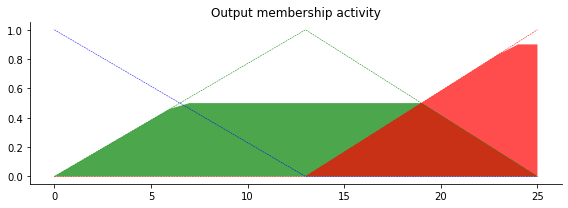

In [36]:
# We need the activation of our fuzzy membership functions at these values.
# The exact values 6.5 and 9.8 do not exist on our universes...
# This is what fuzz.interp_membership exists for!
r2_level_lo = fuzz.interp_membership(x_r2, r2_lo, 9.5)
r2_level_md = fuzz.interp_membership(x_r2, r2_md, 2.5)
r2_level_hi = fuzz.interp_membership(x_r2, r2_hi, 9.5)

mape_level_lo = fuzz.interp_membership(x_mape, mape_lo, 9.8)
mape_level_md = fuzz.interp_membership(x_mape, mape_md, 3.8)
mape_level_hi = fuzz.interp_membership(x_mape, mape_hi, 4.8)

# Now we take our rules and apply them. Rule 1 concerns bad food OR service.
# The OR operator means we take the maximum of these two.
active_rule1 = np.fmax(r2_level_lo, mape_level_lo)

# Now we apply this by clipping the top off the corresponding output
# membership function with `np.fmin`
tip_activation_lo = np.fmin(active_rule1, dec_lo)  # removed entirely to 0

# For rule 2 we connect acceptable service to medium tipping
tip_activation_md = np.fmin(r2_level_md, dec_md)

# For rule 3 we connect high service OR high food with high tipping
active_rule3 = np.fmax(r2_level_hi, mape_level_hi)
tip_activation_hi = np.fmin(active_rule3, dec_hi)
tip0 = np.zeros_like(x_dec)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_dec, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_dec, dec_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_dec, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_dec, dec_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_dec, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_dec, dec_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

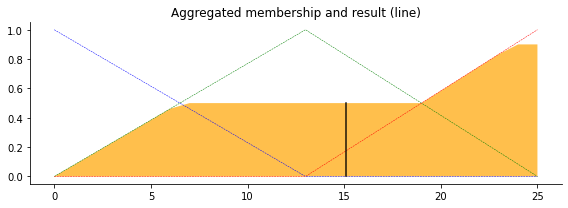

In [38]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_dec, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_dec, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_dec, dec_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_dec, dec_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_dec, dec_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_dec, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()